## Santander Product Recommendation

#### Problem Statement
The dataset given for this Kaggle Competition has 1.5 years of customer behaviour data clubbed with 17 binary columns representing products that the bank offers and if that customer has it. 
Under their current recommendation system that Santander uses for marketing products, a small number of Santander’s customers receive many recommendations while many others rarely see any resulting in an uneven customer experience. In their second competition, Santander is challenging Kagglers to predict which products their existing customers will use in the next month based on their past behavior and that of similar customers.
The challenge is to predict what a customer will buy in addition to what they already had at 2016-05-28. 


#### Data Description
Column #1: Fetch Date ranging from 2015-01-28 to 2016-05-28

Columns #2-#24: Customer Demographics(Age, Sex, Income, Location,etc.)

Columns #25-#48:  Products that customers own

#### Method 1: Association Rule Mining

- Wikipedia Definition of ARM:

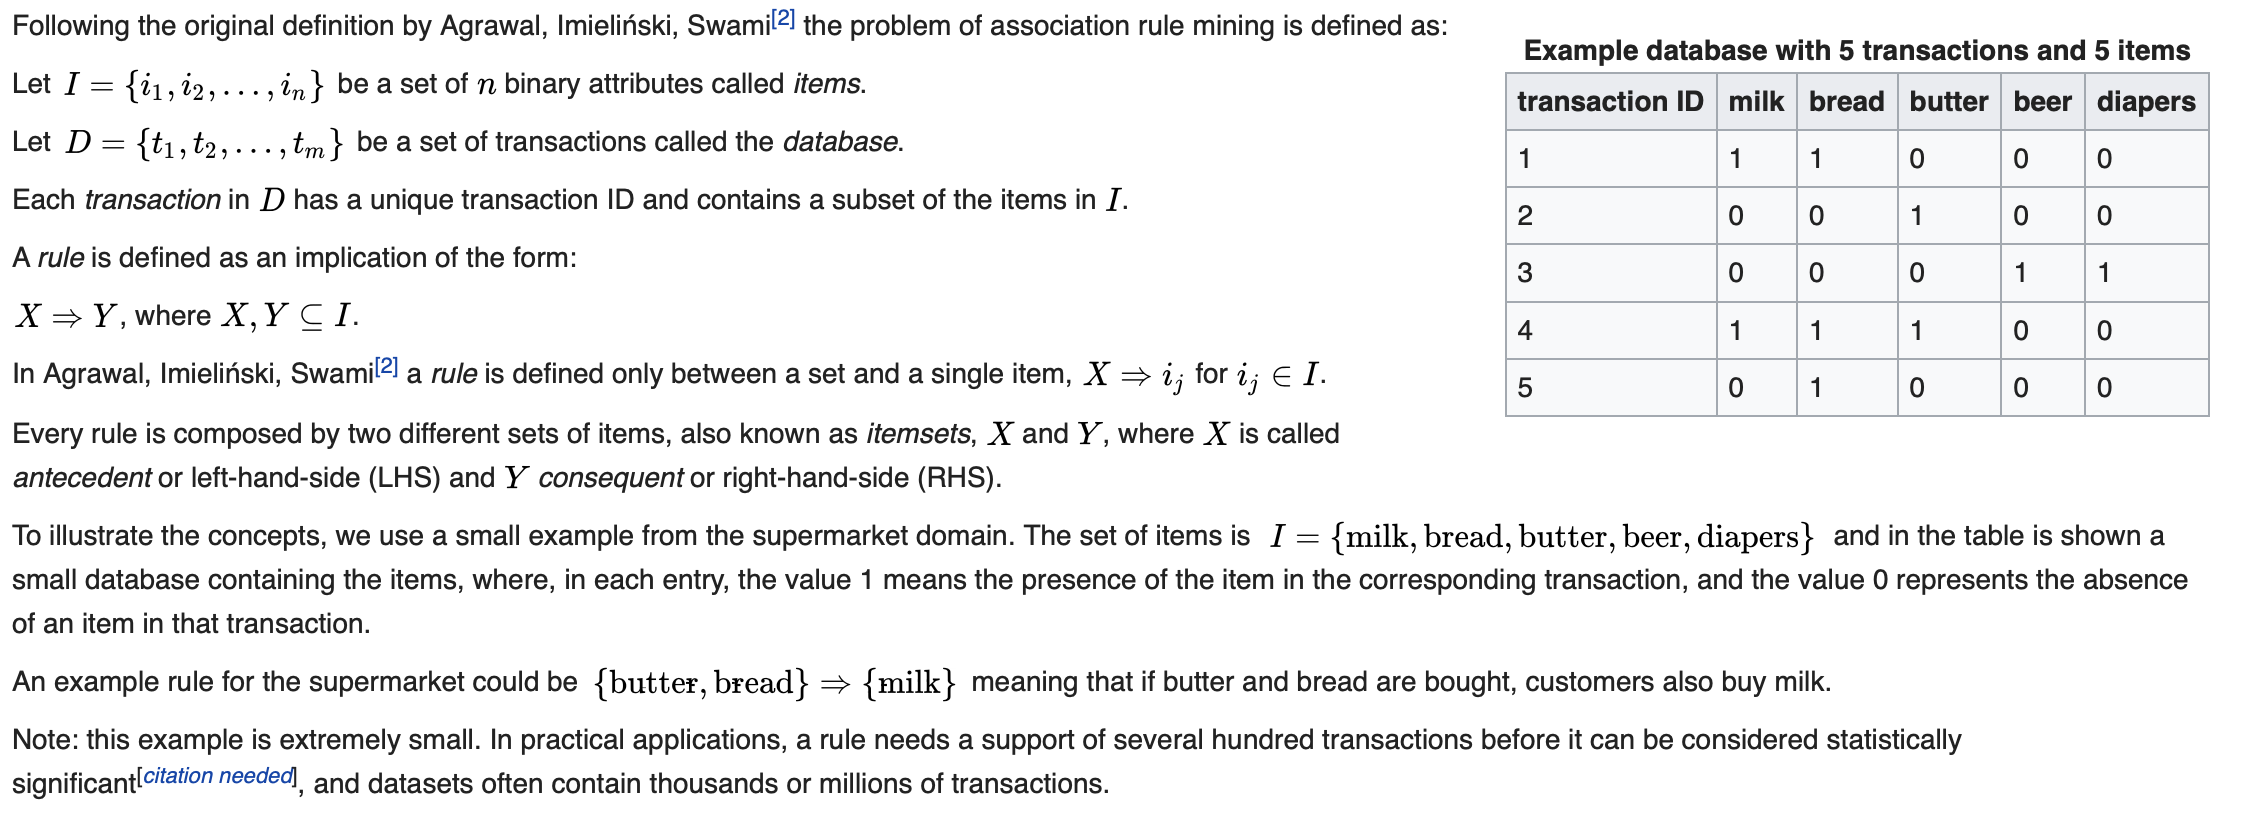

Association rules are if-then statements that help to show the probability of relationships between data items within large data sets in various types of databases. Association rule mining has a number of applications and is widely used to help discover sales correlations in transactional data or in medical data sets.

Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships. Support is an indication of how frequently the items appear in the data. Confidence indicates the number of times the if-then statements are found true. A third metric, called lift, can be used to compare confidence with expected confidence.

- Intuition behind using this approach:

Given the large dataset, and by setting up a high threshold for support and confidence, one could get frequent itemsets for customers i.e. rules. Using these frequent item-sets, we could recommend new products to customers on the basis of what they already own. 



#### Imports necessary for ARM

In [69]:
import numpy as np
import pandas as pd
from apyori import apriori
from efficient_apriori import apriori


import warnings
warnings.filterwarnings("ignore")

#### Importing the datafile

In [70]:
data = pd.read_csv('train_vip.csv')

In [71]:
data.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1/28/15,1050360,N,ES,H,84,8/10/12,0,35,1,...,0,0,0,0,0,0,0,0.0,1.0,1
1,1/28/15,1051725,N,ES,V,54,8/14/12,0,35,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [72]:
data.shape

(562142, 48)

#### Slicing data for the columns needed for Association Rule Mining

In [73]:
data = data[['fecha_dato','ncodpers','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']]

In [74]:
data.shape

(562142, 26)

In [75]:
product_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

In [76]:
#total number of unique customers
len(list(set(data['ncodpers'])))

43838

#### Taking the customer data for the most recent date in the dataset '2016-05-28'

In [77]:
data_per_date = data.loc[data['fecha_dato']=='5/28/16']

In [78]:
data_per_date.shape

(35415, 26)

In [79]:
len(list(set(data_per_date['ncodpers'])))

35415

In [80]:
#data.groupby(['ncodpers']).sum()

#### Data Preprocessing for ARM

In [81]:
data_per_date['sum'] = data_per_date[product_columns].sum(axis = 1, skipna = True)

In [82]:
prod_date_customers = data_per_date.loc[data_per_date['sum']!=0]

In [83]:
prod_date_customers.shape

(35117, 27)

In [84]:
prod_date_customers.head(2)

,fecha_dato,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,sum
526727,5/28/16,657794,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,2.0
526728,5/28/16,657789,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0,4.0


In [85]:
prod_date_customers_values = prod_date_customers.loc[:, product_columns].replace(1, pd.Series(product_columns, product_columns))

In [86]:
records=[]

In [87]:
prod_date_customers_values.shape

(35117, 24)

In [88]:
prod_date_customers_values.set_axis([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],axis=1)

In [89]:
prod_date_customers_values.reset_index(inplace=True)

In [90]:
del prod_date_customers_values['index']

In [91]:
record=[]

In [92]:
prod_date_customers_values

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,ind_cco_fin_ult1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,ind_cco_fin_ult1,0,0,0,0,0,ind_ctpp_fin_ult1,0,...,0,0,0,0,ind_tjcr_fin_ult1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,ind_cco_fin_ult1,0,0,0,0,0,0,0,...,0,0,0,0,0,ind_valo_fin_ult1,0,0,0,0
4,0,0,0,0,ind_cno_fin_ult1,0,0,0,0,0,...,0,0,0,ind_reca_fin_ult1,ind_tjcr_fin_ult1,0,0,ind_nomina_ult1,ind_nom_pens_ult1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35112,0,0,0,0,ind_cno_fin_ult1,0,0,0,0,0,...,0,0,0,0,ind_tjcr_fin_ult1,0,0,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
35113,0,0,ind_cco_fin_ult1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ind_nomina_ult1,ind_nom_pens_ult1,0
35114,0,0,ind_cco_fin_ult1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35115,0,0,ind_cco_fin_ult1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
prod_date_customers_values.replace(0,'',inplace=True)

In [94]:
#converting to numpy arrays
modified_ARM_input = prod_date_customers_values.values

In [95]:
modified_ARM_input[0]

array(['', '', 'ind_cco_fin_ult1', '', '', '', '', '', '', '', '',
       'ind_dela_fin_ult1', '', '', '', '', '', '', '', '', '', '', '',
       ''], dtype=object)

In [96]:
modified_ARM_input1=[]
for row in modified_ARM_input:
    modified_ARM_input1.append(list([x for x in row if x]))


In [97]:
[item for item in modified_ARM_input1 if len(item)==3]

[['ind_cco_fin_ult1', 'ind_ecue_fin_ult1', 'ind_valo_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_dela_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_tjcr_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_valo_fin_ult1'],
 ['ind_cno_fin_ult1', 'ind_ecue_fin_ult1', 'ind_recibo_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_fond_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_fond_fin_ult1'],
 ['ind_cco_fin_ult1', 'ind_dela_fin_ult1', 'ind_tjcr_fin_ult1'],
 ['ind_cno_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1'],
 ['ind_cco_fin_ult1', 'ind_ec

In [98]:
#selecting only customers who own more than one product to see patterns
new_basket=[]
for item in modified_ARM_input1:
    if len(item)!=1:
        new_basket.append(tuple(item))

In [99]:
new_basket[:5]

[('ind_cco_fin_ult1', 'ind_dela_fin_ult1'),
 ('ind_cco_fin_ult1',
  'ind_ctpp_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_tjcr_fin_ult1'),
 ('ind_cco_fin_ult1', 'ind_ecue_fin_ult1', 'ind_valo_fin_ult1'),
 ('ind_cno_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_tjcr_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1'),
 ('ind_cno_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_recibo_ult1')]

#### Setting a Support and Confidence threshold per the dataset

In [100]:
from efficient_apriori import apriori
itemsets, association_rules = apriori(new_basket,min_support=0.15)

itemsets: contains frequent itemsets, the products the tend to occur together
association_rules: itemsets with a defined sequence (antecedents -> consequents)

In [103]:
itemsets[3]

{('ind_cno_fin_ult1', 'ind_ecue_fin_ult1', 'ind_nom_pens_ult1'): 6162,
 ('ind_cno_fin_ult1', 'ind_ecue_fin_ult1', 'ind_nomina_ult1'): 5288,
 ('ind_cno_fin_ult1', 'ind_ecue_fin_ult1', 'ind_recibo_ult1'): 6457,
 ('ind_cno_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1'): 7374,
 ('ind_cno_fin_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'): 7184,
 ('ind_cno_fin_ult1', 'ind_nomina_ult1', 'ind_recibo_ult1'): 6252,
 ('ind_ecue_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1'): 5701,
 ('ind_ecue_fin_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'): 5671,
 ('ind_ecue_fin_ult1', 'ind_nomina_ult1', 'ind_recibo_ult1'): 4874,
 ('ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_recibo_ult1'): 6687}

In [52]:
association_rules[:10]

[{ind_ctop_fin_ult1} -> {ind_cco_fin_ult1},
 {ind_dela_fin_ult1} -> {ind_cco_fin_ult1},
 {ind_cco_fin_ult1} -> {ind_dela_fin_ult1},
 {ind_ecue_fin_ult1} -> {ind_cco_fin_ult1},
 {ind_cno_fin_ult1} -> {ind_ecue_fin_ult1},
 {ind_nom_pens_ult1} -> {ind_cno_fin_ult1},
 {ind_cno_fin_ult1} -> {ind_nom_pens_ult1},
 {ind_nomina_ult1} -> {ind_cno_fin_ult1},
 {ind_cno_fin_ult1} -> {ind_nomina_ult1},
 {ind_reca_fin_ult1} -> {ind_cno_fin_ult1}]

In [53]:
itemsets[1]

{('ind_cco_fin_ult1',): 20470,
 ('ind_cno_fin_ult1',): 10791,
 ('ind_ctop_fin_ult1',): 8065,
 ('ind_ctpp_fin_ult1',): 4823,
 ('ind_dela_fin_ult1',): 15296,
 ('ind_ecue_fin_ult1',): 17208,
 ('ind_fond_fin_ult1',): 6123,
 ('ind_nom_pens_ult1',): 9165,
 ('ind_nomina_ult1',): 7909,
 ('ind_reca_fin_ult1',): 6979,
 ('ind_recibo_ult1',): 13591,
 ('ind_tjcr_fin_ult1',): 6776,
 ('ind_valo_fin_ult1',): 6499}

In [81]:
pd.DataFrame(itemsets).to_csv('FrequentItemsVIP.csv')

In [243]:
pd.DataFrame(association_rules).to_csv('Rules_sup_0.05.csv')

In [54]:
#itemsets